In [23]:
import torch
import pandas as np
import numpy as np
import matplotlib.pyplot as plt

In [24]:
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

2.3.0
True
0
NVIDIA GeForce GTX 1060


## Introduction to Tensors

### Creating Tensors

In [55]:
# moving the tensors to the gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
data = [[1,2], [3,4]]
data1 = np.array(data)
x_data = torch.tensor(data)

In [70]:
data2 = np.random.randint(0, 10, (4,4))
x_data2 = torch.tensor(data2)

In [71]:
print(type(data))
print(type(data1))
print(type(data2))
print(type(x_data2[0][2]))
print(x_data2.shape)
print(x_data2.dtype)
x_data2

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>
torch.Size([4, 4])
torch.int64


tensor([[8, 1, 2, 6],
        [9, 5, 1, 3],
        [0, 9, 7, 9],
        [2, 5, 6, 7]])

In [82]:
x_ones = torch.ones_like(x_data2)
print(f"Ones Tensor: \n{x_ones}\n")

x_rand = torch.randint_like(x_data2, 0, 10, device=device)
print(f"Random Tensor [0,1]: \n{x_rand}\n")

Ones Tensor: 
tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

Random Tensor [0,1]: 
tensor([[3, 0, 3, 7],
        [6, 3, 9, 3],
        [8, 7, 2, 8],
        [8, 1, 0, 1]], device='cuda:0')



In [83]:
print(f"Shape of tensor: {x_rand.shape}")
print(f"Datatype of tensor: {x_rand.dtype}")
print(f"Device tensor is stored on: {x_rand.device}")

Shape of tensor: torch.Size([4, 4])
Datatype of tensor: torch.int64
Device tensor is stored on: cuda:0


In [85]:
print(f"Tensor: \n{x_rand}")
print()
print(f"First row: {x_rand[0,:]}")
print(f"First column: {x_rand[:,0]}")
print(f"Main diagonal: {[x_rand[i,i] for i in range(4)]}")

Tensor: 
tensor([[3, 0, 3, 7],
        [6, 3, 9, 3],
        [8, 7, 2, 8],
        [8, 1, 0, 1]], device='cuda:0')

First row: tensor([3, 0, 3, 7], device='cuda:0')
First column: tensor([3, 6, 8, 8], device='cuda:0')
Main diagonal: [tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(2, device='cuda:0'), tensor(1, device='cuda:0')]


In [96]:
t1 = torch.cat([x_rand, x_rand, x_rand], dim=0)
t2 = torch.stack([x_rand, x_rand, x_rand], dim=2)
t2

tensor([[[3, 3, 3],
         [0, 0, 0],
         [3, 3, 3],
         [7, 7, 7]],

        [[6, 6, 6],
         [3, 3, 3],
         [9, 9, 9],
         [3, 3, 3]],

        [[8, 8, 8],
         [7, 7, 7],
         [2, 2, 2],
         [8, 8, 8]],

        [[8, 8, 8],
         [1, 1, 1],
         [0, 0, 0],
         [1, 1, 1]]], device='cuda:0')

In [125]:
tensor = torch.ones((4,4), device=device)
tensor2 = torch.zeros((4,4), device=device)
tensor2[-1,:] +=  torch.tensor(np.array([2 for i in range(len(tensor2[0]))]), device=device)

In [122]:
for i in range(4):
    tensor += tensor2
    print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [3., 3., 3., 3.]], device='cuda:0')
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [5., 5., 5., 5.]], device='cuda:0')
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [7., 7., 7., 7.]], device='cuda:0')
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [9., 9., 9., 9.]], device='cuda:0')


In [155]:
print(tensor)
print(tensor2)
print(tensor2 @ tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0')
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [2., 2., 2., 2.]], device='cuda:0')
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [8., 8., 8., 8.]], device='cuda:0')
tensor([[[2, 1, 0, 0],
         [3, 0, 0, 3],
         [0, 4, 3, 0],
         [0, 0, 3, 3]],

        [[2, 1, 1, 2],
         [0, 3, 0, 1],
         [3, 0, 3, 2],
         [0, 2, 0, 3]]])


## Training Modelds

In [128]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [129]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [143]:
sample_idx = torch.randint(len(training_data), size=(1,)).item()
img, label = training_data[sample_idx]

1, 3


In [146]:
print(f"{img.shape}, {label}")

torch.Size([1, 28, 28]), 3


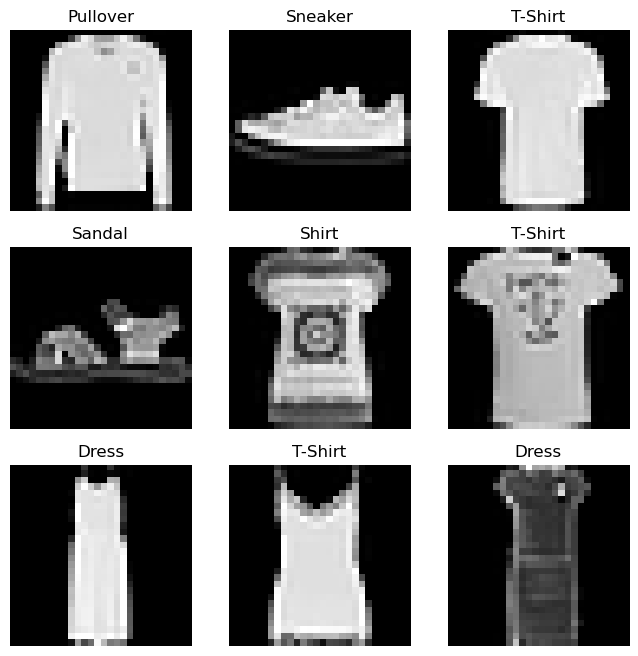

In [168]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()